#  TP3 : Clustering et Word2Vec

### Wala Zerelli 

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [77]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/walazerelli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/walazerelli/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [81]:
data_path = "txt"

## Choisir une décennie

In [79]:
DECADE = '1960'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [89]:
files = [f for f in sorted(os.listdir ("./txt/")) if f"_{DECADE[:-1]}" in f]

In [84]:
# Exemple de fichiers
files[:6]

['KB_JB838_1960-01-10_01-00018.txt',
 'KB_JB838_1960-01-12_01-00011.txt',
 'KB_JB838_1960-01-13_01-00009.txt',
 'KB_JB838_1960-01-21_01-00014.txt',
 'KB_JB838_1960-01-22_01-00015.txt',
 'KB_JB838_1960-01-27_01-00006.txt']

In [90]:
texts = [open("./txt/" + f, "r", encoding="utf-8").read() for f in files]

In [91]:
# Exemple de textes
texts[0][:400]

"ia« le som ÏJsIne MéuhMrïiqii S.AT'BBirîï^^ J00, r. Merlu» Duché, Vllvorde ch. STENO-DACTYLO élément de let ordre, bilingue, bon- i ne rémunération. Situation d’avenir, i Candidat, A soumet par écrit 130221H PORTANTE 80C.BRUXELL0I8I cherche pour entrée Immédiate Secrétaire Sténo-Dactylo 3 françalee - 1 an d'expérience, al tuât h «table - semaine de 5 Jours. Ecrire é cur. vit et prêt Ag. Rossel 029"

## Vectoriser les documents à l'aide de TF-IDF

In [92]:

def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [93]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [94]:
tfidf_vectors = vectorizer.fit_transform(texts)

/Users/walazerelli/Desktop/Traitement corpus /tac/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [95]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 591558 stored elements and shape (1000, 2998)>

### Imprimer le vecteur tf-IDF du premier document

In [96]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

rossel        0.429849
ecrire        0.290763
agence        0.287302
bilingue      0.195620
importante    0.172368
                ...   
û             0.000000
♦             0.000000
ô             0.000000
événements    0.000000
ê             0.000000
Length: 2998, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [97]:
cosine([1, 2, 3], [1, 2, 3])

np.float64(0.0)

In [98]:
cosine([1, 2, 3], [1, 2, 2])

np.float64(0.02004211298777725)

In [99]:
cosine([1, 2, 3], [2, 2, 2])

np.float64(0.07417990022744858)

### Tests sur nos documents

In [100]:
tfidf_array = tfidf_vectors.toarray()

In [101]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [102]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.01044745, ..., 0.01088908, 0.01243897,
       0.        ])

In [103]:
cosine(tfidf_array[0], tfidf_array[1])

np.float64(0.9628761011759681)

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [104]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [105]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [106]:
clusters = km_model.fit_predict(tfidf_vectors)

In [107]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [108]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1960-02-26_01-00011.txt',
               'KB_JB838_1960-07-13_01-00006.txt',
               'KB_JB838_1960-07-26_01-00004.txt',
               'KB_JB838_1960-09-02_01-00013.txt',
               'KB_JB838_1961-02-04_01-00004.txt',
               'KB_JB838_1961-06-07_01-00006.txt',
               'KB_JB838_1961-06-23_01-00011.txt',
               'KB_JB838_1961-06-30_01-00013.txt',
               'KB_JB838_1961-07-01_01-00011.txt',
               'KB_JB838_1961-09-12_01-00012.txt',
               'KB_JB838_1961-09-21_01-00011.txt',
               'KB_JB838_1961-10-27_01-00004.txt',
               'KB_JB838_1961-12-13_01-00010.txt',
               'KB_JB838_1961-12-14_01-00011.txt',
               'KB_JB838_1961-12-28_01-00004.txt',
               'KB_JB838_1962-01-09_01-00012.txt',
               'KB_JB838_1962-01-25_01-00011.txt',
               'KB_JB838_1962-02-24_01-00010.txt',
               'KB_JB838_1962-05-01_01-00010.txt',
               'KB_JB838_1962-0

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [109]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [110]:
reduced_vectors[:10]

array([[ 0.4992516 , -0.43941756],
       [-0.22887339,  0.00137504],
       [-0.27929012, -0.01571175],
       [ 0.28623276,  0.51679184],
       [ 0.3069986 ,  0.51868354],
       [-0.28969465, -0.09047481],
       [-0.04744473,  0.04053176],
       [-0.06063925,  0.11980049],
       [-0.22347725, -0.05224724],
       [-0.12166066,  0.07459225]])

### Générer le plot

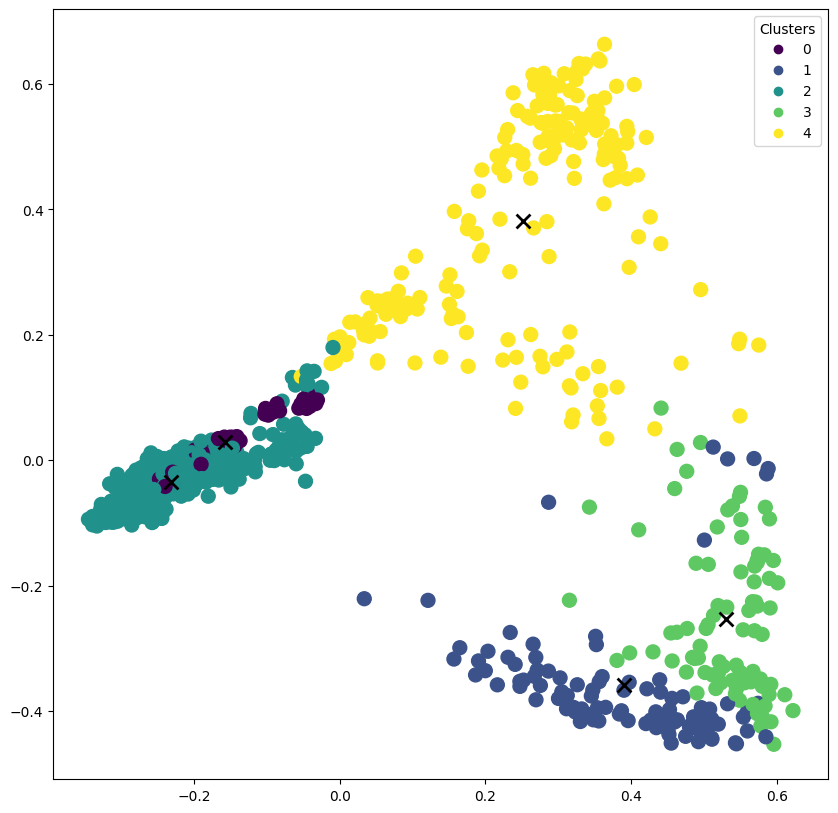

In [111]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

### 3. Interprétation des résultats
Bien que tous les clusters ne représentent pas le même nombre de documents, nous pouvons remarquer que le nombre de documents dans les 3 premiers clusters est assez proche. Cependant, le cluster 4 s’éloigne du nombre de documents des trois premiers clusters.
Et enfin le cluster 5 est celui regroupant le plus grand nombre de documents. En effet, il regroupe presque la moitié de tous les documents. De manière générale, nous pouvons dire que les 5 clusters sont assez bien distincts les uns des autres. 

Les clusters sont bien séparés, ce qui montre que le modèle a capturé les thématiques principales de manière cohérente.

### 4. Téléchargement et préparation du fichier sents.txt
Le fichier sents.txt a été téléchargé et placé dans le dossier data/. Ce fichier contient des phrases segmentées, prêtes pour l'entraînement du modèle Word2Vec.

### 5. Entraîner un modèle Word2Vec
J'ai utilisé le fichier sents.txt pour entraîner un modèle Word2Vec en utilisant le notebook s3_word_embeddings.ipynb.

In [118]:
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

nltk.download('punkt')

# Charger et traiter les phrases du corpus
class MySentences(object):
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8'):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

infile = "../data/sents.txt"
sentences = MySentences(infile)

# Détection des bigrams et trigrams
bigram_phrases = Phrases(sentences)
bigram_phraser = Phraser(bigram_phrases)
trigram_phrases = Phrases(bigram_phraser[sentences])
trigram_phraser = Phraser(trigram_phrases)
corpus = list(trigram_phraser[bigram_phraser[sentences]])

# Entraîner le modèle Word2Vec
model = Word2Vec(corpus, vector_size=32, window=1, min_count=1, workers=4, epochs=5)
model.save("../data/word2vec.model")


ModuleNotFoundError: No module named 'gensim'

### 6. Comparaison des modèles



In [122]:
window = 10, min_count = 10 : Moins efficace, car cela peut entraîner l'ignorance de mots significatifs en raison du seuil élevé pour les occurrences minimales.
window = 3, min_count = 1 : Trop bruité, car cela inclut un grand nombre de mots rares ou peu pertinents.
   ]


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1081722637.py, line 1)